In [1]:
# Import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## load preprocess and convert image to blob

In [2]:
# load the image to detect
img_to_detect = cv2.imread('images/scene1.jpg')

In [3]:
img_to_detect.shape

(601, 850, 3)

In [4]:
# get height and width of image
img_height = img_to_detect.shape[0]
img_width = img_to_detect.shape[1]

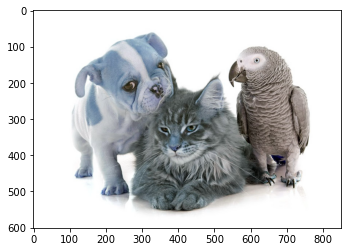

In [5]:
plt.imshow(img_to_detect)

In [6]:
# resize to mtach input size
resized_img_to_detect = cv2.resize(img_to_detect,(300,300))

In [7]:
resized_img_to_detect.shape

(300, 300, 3)

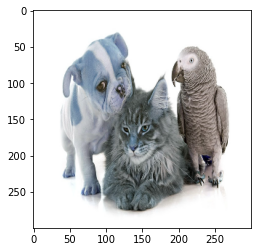

In [8]:
plt.imshow(resized_img_to_detect)

In [9]:
# convert to blob to pass into model
# recommended scale factor is 0.007843 and width, height of blob is 300,300 and mean of 255 is 127.5
img_blob = cv2.dnn.blobFromImage(resized_img_to_detect,0.007843,(300,300),127.5)

In [10]:
# Set of 21 class labels in alphabetical order (background + rest of 20 classes)

class_labels = ['background','aeroplane','bicycle','bird','boat','bottle','bus','car','cat','chair','cow','dining table','dog','horse','motorbike','potted plant','sheep','sofa','train','tv/monitor']

## Load Pre-trained model and get prediction

In [11]:
# Loading pre-trained model from prototext and caffemodel files 

mobilenetssd = cv2.dnn.readNetFromCaffe('datasets/mobilenetssd.prototext','datasets/mobilenetssd.caffemodel')

In [12]:
# Input preprocessed blob into model and pass through the model
mobilenetssd.setInput(img_blob)

In [13]:
# obtain the detection predictions by the model using forward() method
obj_detections = mobilenetssd.forward()

In [14]:
obj_detections.shape

(1, 1, 100, 7)

## Loop over detections, Get Class labels, Box co-ordinates

In [15]:
# Loop over the detections
no_of_detections = obj_detections.shape[2]

for index in np.arange(0, no_of_detections):
    prediction_confidence = obj_detections[0,0,index,2]
    # take only predictions with confidence more than 20%
    if prediction_confidence > 0.1:
        # get the prediction label
        predicted_class_index = int(obj_detections[0,0,index,1])
        predicted_class_label = class_labels[predicted_class_index]
        # obtain the bounding box co-ordinates for the actual image from resized image size
        bounding_box = obj_detections[0,0,index,3:7] * np.array([img_width, img_height, img_width, img_height])
        (start_x_pt, start_y_pt, end_x_pt, end_y_pt) = bounding_box.astype("int")
        
        # Print the prediction in console
        predicted_class_label = "{}: {:2f}%".format(class_labels[predicted_class_index],prediction_confidence*100)
        print("predicted object {}: {}".format(index+1,predicted_class_label))

        # Draw rectangle and text in the image
        cv2.rectangle(img_to_detect, (start_x_pt,start_y_pt), (end_x_pt,end_y_pt), (0,0,255),2)
        cv2.putText(img_to_detect, predicted_class_label, (start_x_pt,start_y_pt-5), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,255,0),1)

predicted object 1: cat: 99.760520%
predicted object 2: bird: 99.664909%
predicted object 3: dog: 74.404126%
predicted object 4: cat: 36.573750%


In [16]:
# Show the output image
#plt.imshow(img_to_detect)

cv2.imshow("Detection Output", img_to_detect)
cv2.waitKey(0)
cv2.destroyAllWindows()